# Example notebook for Ensemble Timesereies  

##### This notebook demonsterates how the ensemble module can be used for 1D timesereies data from a single ensemble or multi-model ensemble memebers

In [1]:
import xarray as xr
import glob
from aqua.diagnostics import EnsembleTimeseries
from aqua.diagnostics import PlotEnsembleTimeseries
from aqua.diagnostics import retrieve_merge_ensemble_data

/work/ab0995/a270260/aqua/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [2]:
# loading the paths of the data:
# Monthly timeseries data 
mon_file_list = glob.glob('/work/ab0995/a270260/pre_computed_aqua_analysis/*/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_*_historical-1990_mon.nc')
# sorting the list because we want to assign the name to the models
mon_file_list.sort() 
# Annual timeseries data
ann_file_list = glob.glob('/work/ab0995/a270260/pre_computed_aqua_analysis/*/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_*_historical-1990_ann.nc')
# sorting the list because we want to assign the name to the models
ann_file_list.sort()

In [3]:
# Reteriveing and merging the datasets in monthly and annual ensembles with given 'startdate' and 'enddate'
# Monthly:
# mon_model_dataset = retrieve_merge_ensemble_data(variable='2t', startdate='1990-01-01', enddate='1999-12-31', data_path_list=mon_file_list, log_level = "WARNING",ens_dim="ensemble")
# Annual:
# ann_model_dataset = retrieve_merge_ensemble_data(variable='2t', startdate='1990-01-01', enddate='1999-12-31', data_path_list=ann_file_list, log_level = "WARNING",ens_dim="ensemble")

In [4]:
# # Without assigning names to the models 
# # Reteriveing and merging the datasets in monthly and annual ensembles 
# # Monthly:
# mon_model_dataset = retrieve_merge_ensemble_data(variable='2t', data_path_list=mon_file_list, log_level = "WARNING",ens_dim="ensemble")
# # Annual:
# ann_model_dataset = retrieve_merge_ensemble_data(variable='2t', data_path_list=ann_file_list, log_level = "WARNING",ens_dim="ensemble")

In [5]:
# Assiging names to each model in the following function
# Reteriveing and merging the datasets in monthly and annual ensembles
# Monthly:
mon_model_dataset = retrieve_merge_ensemble_data(variable='2t', model_names= ['IFS-FESOM', 'IFS-NEMO'], data_path_list=mon_file_list, log_level = "WARNING",ens_dim="ensemble")
# Annual:
ann_model_dataset = retrieve_merge_ensemble_data(variable='2t', model_names= ['IFS-FESOM', 'IFS-NEMO'], data_path_list=ann_file_list, log_level = "WARNING",ens_dim="ensemble")

In [6]:
# loading the reference data as xarrays
variable='2t'

# Monthly reference data
ERA5_mon = '/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_ERA5_era5_mon.nc'
mon_ref_data = xr.open_dataset(ERA5_mon,
                              drop_variables=[var for var in xr.open_dataset(ERA5_mon).data_vars if var != variable])
# selection ERA5 data on the same time interval -> xarray.DataArray 
mon_ref_data = mon_ref_data[variable].sel(time=slice(mon_model_dataset.time[0],mon_model_dataset.time[-1]))

# Annual reference data
ERA5_ann = '/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_ERA5_era5_ann.nc'
ann_ref_data = xr.open_dataset(ERA5_ann,
                              drop_variables=[var for var in xr.open_dataset(ERA5_ann).data_vars if var != variable])
# selection ERA5 data on the same time interval -> xarray.DataArray 
ann_ref_data = ann_ref_data[variable].sel(time=slice(ann_model_dataset.time[0],ann_model_dataset.time[-1]))

In [7]:
# path on Lumi 
# ERA5 monthly data: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_ERA5_era5_mon.nc
# ERA5 annual data: pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_ERA5_era5_ann.nc

# IFS-NEMO monthly: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-NEMO/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_IFS-NEMO_historical-1990_mon.nc 
# IFS-NEMO annual: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-NEMO/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_IFS-NEMO_historical-1990_ann.nc

# IFS-FESOM monthly: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_IFS-FESOM_historical-1990_mon.nc
# IFS-FESOM annual: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_IFS-FESOM_historical-1990_ann.nc

In [9]:
# Check if we need monthly and annual time variables
ts = EnsembleTimeseries(                                                                               
    var=variable,
    monthly_data=mon_model_dataset,                                                                      
    annual_data=ann_model_dataset,                                                                        
    outputdir='./',
    loglevel='WARNING',
)   
                 
# Compute statistics and save the results as netcdf                                                    
ts.run()  

In [10]:
# PlotEnsembleTimeseries class                                                                         
plot_arguments = {                                                                                     
    "var": variable,
    "save_pdf": True,
    "save_png": True,
    "plot_ensemble_members": True,                                                    
    "title": "Multi-Model Ensemble Statistics",
    "model_list": ['IFS-FESOM', 'IFS-NEMO'],
    #"model_list": "Multi-model",
    "ref_model": 'ERA5',
}

ts_plot = PlotEnsembleTimeseries(                                                                      
    **plot_arguments,   
    
    monthly_data=ts.monthly_data,                                                                      
    monthly_data_mean=ts.monthly_data_mean,                                                            
    monthly_data_std=ts.monthly_data_std,                                                              
    annual_data=ts.annual_data,
    annual_data_mean=ts.annual_data_mean,                                                              
    annual_data_std=ts.annual_data_std,
    ref_monthly_data=mon_ref_data,
    ref_annual_data=ann_ref_data,
    log_level='WARNING',
)  

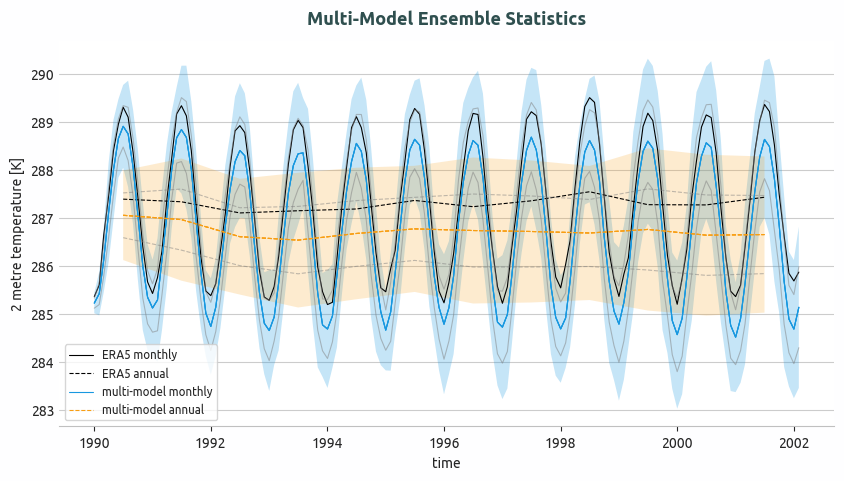

In [11]:
ensemble_plot = ts_plot.plot()